In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import beta
%matplotlib inline

In [2]:
def plotbetapdfs(ab, sp_idx, tally):
    # ab is a 3-by-2 matrix containing the a,b parameters for the
    # priors/posteriors
    # Before the first flip: ab = [[1, 1], [0.5, 0.5], [50, 50]]
    #
    # sp_idx is a 3-tuple that specfies in which subplot to plot the current
    # distributions specified by the (a,b) pairs in ab.
    # 
    # tally is a 2-tuple (# heads, # tails) containing a running count of the
    # observed number of heads and tails.
    # Before the first flip: tally=(0,0)

    num_rows = np.shape(ab)[0]
    mark = ['b-','r:','g--'];

    if 'axes' not in globals():
        global fig
        global axes
        fig, axes = plt.subplots(sp_idx[0], sp_idx[1])
        fig.set_figheight(10)
        fig.set_figwidth(10)
    elif np.shape(axes)[0] != sp_idx[:2][0] or np.shape(axes)[1] != sp_idx[:2][1]:
        print(sp_idx[:2])
        print(list(np.shape(axes)))
        fig, axes = plt.subplots(sp_idx[0], sp_idx[1])
        fig.set_figheight(10)
        fig.set_figwidth(10)

    for row in range(num_rows):
        a = ab[row][0]
        b = ab[row][1]
        
        x = np.linspace(0.001, 0.999, num=999)
        y = beta.pdf(x, a, b)
        norm_y = y / max(y)
        
        marker = mark[row]
        ax = axes[sp_idx[2]//sp_idx[1], sp_idx[2]%sp_idx[1]]

        ax.plot(x, norm_y, mark[row], lw=2)
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1.2])
        ax.set_title(str(tally[0])+' h, '+str(tally[1])+' t')
        ax.set_xlabel('Bias weighting for heads $\mu$')
        ax.set_ylabel('$p(\mu|\{data\},I)$')
    
    fig.tight_layout()
    plt.close()
    return fig

### (a)

In [3]:
mu = 0.25
ab = [[1, 1], [0.5, 0.5], [50, 50]]
tally=[0,0]
sp_idx = [3,2,0]
plot = plotbetapdfs(ab, sp_idx, tally)
for i in range(5):
    sp_idx[2] = i + 1
    flip = np.random.choice([1,0], p = [mu, 1-mu])
    if flip == 0:
        tally[1] += 1
    else:
        tally[0] += 1    
    ab_new = (np.array(np.transpose(np.matrix([np.array(np.transpose(np.matrix(ab)))[0] + tally[0],
              np.array(np.transpose(np.matrix(ab)))[1] + tally[1]]))))
    plot = plotbetapdfs(ab_new,sp_idx,tally)

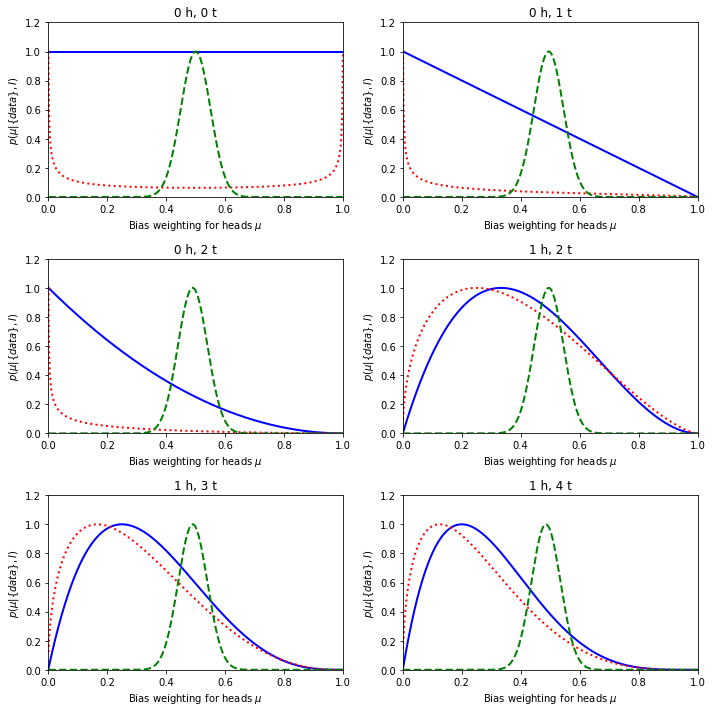

In [4]:
plot

### (b)

In [3]:
mu = 0.25
ab = [[1, 1], [0.5, 0.5], [50, 50]]
tally=[0,0]
sp_idx = [4,3,0]
plot2 = plotbetapdfs(ab, sp_idx, tally)
for i in range(11):
    sp_idx[2] = i + 1
    tally_i = [0,0]
    flip = np.random.choice([1,0], size = 2**(i+1),p = [mu, 1-mu])
    for num in flip:
        if num == 0:
            tally_i[1] += 1
        else:
            tally_i[0] += 1    
    ab_new = (np.array(np.transpose(np.matrix([np.array(np.transpose(np.matrix(ab)))[0] + tally_i[0],
              np.array(np.transpose(np.matrix(ab)))[1] + tally_i[1]]))))
    plot2 = plotbetapdfs(ab_new,sp_idx,tally_i)

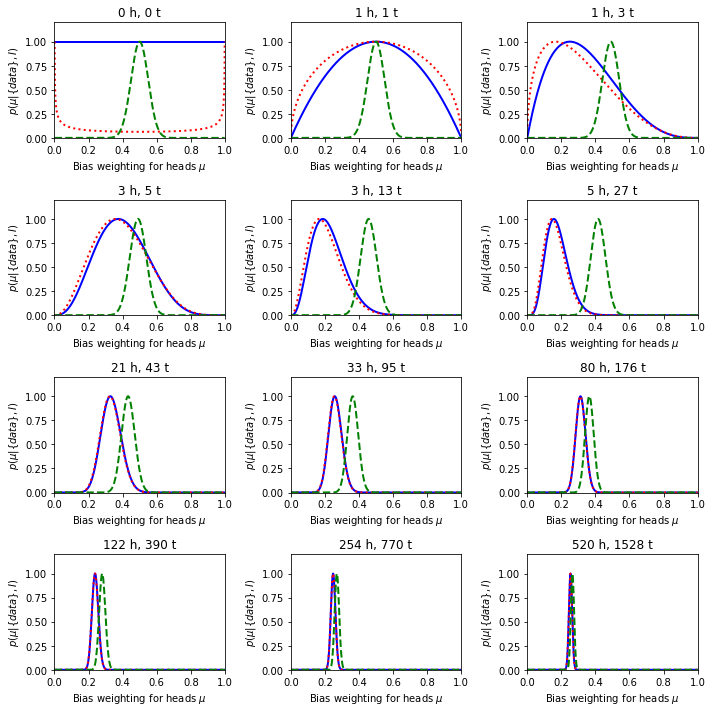

In [4]:
plot2

### (c)

As we can see from the plots, the distributions where a and b are both set to 50 are centered at mu = 0.25, while the other two priors do not produce similar distributions. This is due to the fact that as we set both a and b to 50, we are setting much more fake data than 5, which is our sample size. With a large amount of fake data provided in the case of Beta(50,50), our sample could not easily overcome it, and mu will stay centered around 0.25. On the other hand, with Beta(1,1) or Beta(0.5,0.5), although they have the same mu, it is much easier to overcome by 5 true sample. 

### (d)

As we obtain large amount of true observations, the relatively small amount of fake data we set before hardly affects resulting distribution. Thus, after thousands of flips, the center of distribution will approach the true mean that is observed from the thousands of true data.